## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Create the dataset

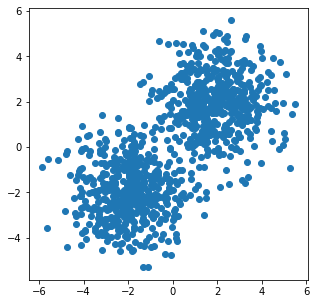

In [2]:
# We will use a simple dataset, to visualize it well
nbr_samples = 1000
data = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.3, 1.3], n_samples=nbr_samples, random_state=0)[0]
plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Create the K-means model

In [3]:
# Initialize the centroids
def init_centroids(X, K):
    ''' Recieve the data and K the numbre of cluste'''
    m, n = X.shape
    centroids = np.zeros((K, n))
    idx_centroids = np.random.randint(0, m, K)
    for i in range(K):
        centroids[i] = X[idx_centroids[i]]
    
    return centroids           

In [4]:
# Select samples for each centroid (for creat the clusters)
def select_cluster(X, centroids):
    m, n = X.shape
    K = centroids.shape[0]
    index = np.zeros(m)
    for i in range(m):
        norms = []
        for k in range(K):
            norm = np.sum((X[i,:] - centroids[k,:]) ** 2)
            norms.append(norm)
            
        index[i] = norms.index(min(norms))
    return index       

In [5]:
# Moving the centroids (K-means algorithm)
def new_centroids(X, centroids):
    m, n = X.shape
    K = centroids.shape[0]
    new_centroids = np.zeros(centroids.shape)
    index = select_cluster(X, centroids)
    for k in range(K):
        idx = np.where(index == k)[0]
        new_centroids[k] = np.sum(X[idx,:], axis=0) / len(idx)
    return new_centroids

In [6]:
# Apply the K-means algorithm for clustering the data
def clustering_data(X, K=2, iterations=10):
    """"Default number of cluster is 2, and default
        number of iterations is 10 """
    
    # Initialize the centroids
    centroids = init_centroids(X, K)
    
    # Select clusters and move the cenrtroids for the number of iterations
    for itrs in range(iterations): 
        index = select_cluster(X, centroids)
        centroids = new_centroids(X, centroids)
        
    index = select_cluster(X, centroids)
    idx_clusters = []
    for k in range(K):
        idx_clusters.append(np.where(index == k)[0])

    return idx_clusters    

## Apply the model

In [7]:
idx_clusters = clustering_data(data, K=2, iterations=10)

## Show the clusters

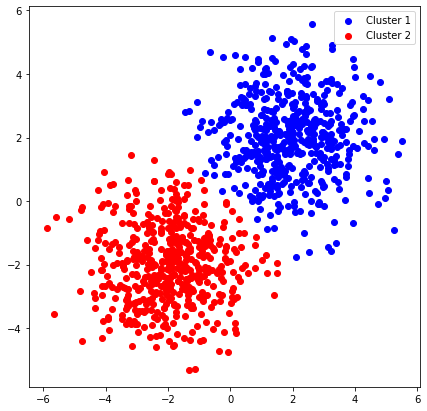

In [8]:
plt.figure(figsize=(7, 7))
plt.scatter(data[idx_clusters[0], 0], data[idx_clusters[0], 1], c='b', label='Cluster 1')
plt.scatter(data[idx_clusters[1], 0], data[idx_clusters[1], 1], c='r', label='Cluster 2')
plt.legend()
plt.show()